In [0]:
!pip install -q seaborn

In [2]:
from __future__ import absolute_import, division, print_function

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

!pip install -q tensorflow==2.0.0-alpha0
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

    100% |████████████████████████████████| 79.9MB 422kB/s 
    100% |████████████████████████████████| 61kB 22.5MB/s 
    100% |████████████████████████████████| 3.0MB 11.6MB/s 
    100% |████████████████████████████████| 419kB 22.2MB/s 
2.0.0-alpha0


In [3]:
dataset_path = keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

32768/30286 [================================] - 0s 2us/step


'/root/.keras/datasets/auto-mpg.data'

In [0]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin'] 

In [0]:
raw_dataset= pd.read_csv(dataset_path,names = column_names, na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

In [6]:
data = raw_dataset.copy(deep = True)
data.head(3)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1


In [7]:
data.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [8]:
data['Horsepower'].describe().T

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: Horsepower, dtype: float64

In [9]:
data.corr()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
MPG,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267,0.563450
Cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746,-0.562543
Displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164,-0.609409
Horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
Weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564,-0.581024
Acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137,0.205873
Model Year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000,0.180662
Origin,0.563450,-0.562543,-0.609409,-0.455171,-0.581024,0.205873,0.180662,1.000000


In [11]:
#based on no of cylinders imputing displacement
data.groupby(data.Cylinders)['Horsepower']

In [12]:
data.groupby(data.Cylinders)['Horsepower'].mean()

Cylinders
3     99.250000
4     78.281407
5     82.333333
6    101.506024
8    158.300971
Name: Horsepower, dtype: float64

In [0]:
data['Horsepower'] = data.groupby(data.Cylinders)['Horsepower']\
                      .apply(lambda x: x.fillna(x.mean()))

In [14]:
data.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [15]:
origin = data.pop('Origin')
data['USA'] = (origin == 1)*1.0
data['Europe'] = (origin == 2)*1.0
data['Japan'] = (origin == 3)*1.0
data.tail(3)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [0]:
#splitting to train test split
train_dataset = data.sample(frac=0.8, random_state=111)
test_dataset = data.drop(train_dataset.index)

In [18]:
print(train_dataset.shape)
print(test_dataset.shape)
print(data.shape)

(318, 10)
(80, 10)
(398, 10)


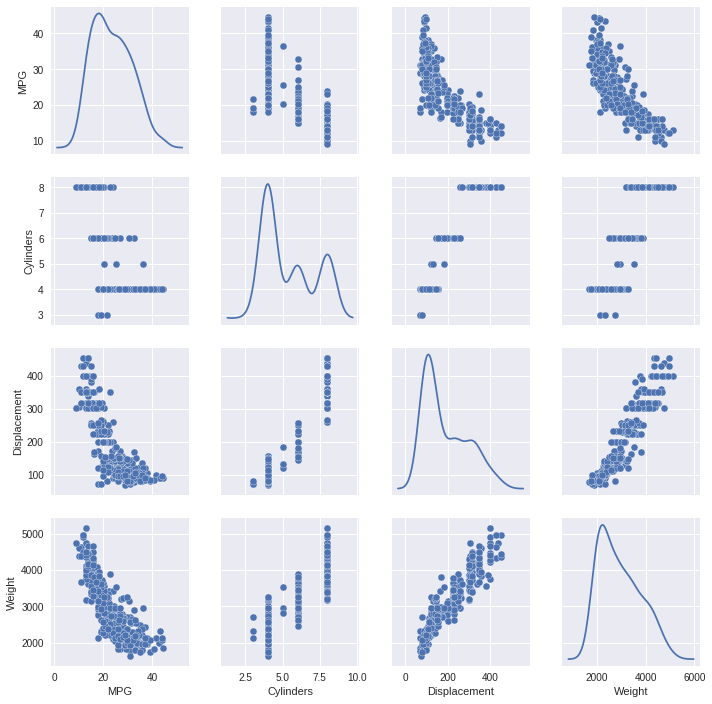

In [20]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde");

In [0]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [0]:
test_labels

In [26]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,318.0,5.415094,1.693565,3.0,4.000,4.0,7.5,8.0
Displacement,318.0,190.089623,103.272765,68.0,98.000,144.5,259.5,455.0
Horsepower,318.0,102.794439,38.478550,46.0,75.000,90.0,120.0,230.0
Weight,318.0,2934.352201,832.756721,1649.0,2206.250,2781.5,3516.0,5140.0
Acceleration,318.0,15.554088,2.748782,8.0,13.825,15.5,17.0,24.8
Model Year,318.0,75.959119,3.706278,70.0,73.000,76.0,79.0,82.0
USA,318.0,0.616352,0.487040,0.0,0.000,1.0,1.0,1.0
Europe,318.0,0.191824,0.394356,0.0,0.000,0.0,0.0,1.0
Japan,318.0,0.191824,0.394356,0.0,0.000,0.0,0.0,1.0


In [0]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [0]:
def build_model():
  model = keras.Sequential([
      layers.Dense(64,activation = 'relu',input_shape=[len(train_dataset.keys())]),
      layers.Dropout(0.2),
      layers.Dense(64,activation='relu'),
      layers.Dropout(0.2),
      layers.Dense(64, activation='relu'),
      layers.Dropout(0.2),
      layers.Dense(1)
  ])
  
  optimizer = tf.keras.optimizers.RMSprop(0.001)
  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [0]:
model = build_model()

In [48]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 64)                640       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [33]:
#trying model untrained to check for output validity

example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.00957412],
       [ 0.12486336],
       [ 0.01384704],
       [ 0.0411446 ],
       [-0.17877895],
       [ 0.02446365],
       [-0.17239238],
       [ 0.01769627],
       [-0.07176983],
       [ 0.03998759]], dtype=float32)

In [49]:

class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('epoch - {}'.format(epoch), end='\n')
    

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])

epoch - 0
epoch - 100
epoch - 200
epoch - 300
epoch - 400
epoch - 500
epoch - 600
epoch - 700
epoch - 800
epoch - 900


In [50]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail(10)

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
990,7.657495,2.177840,7.657495,6.387172,1.751221,6.387172,990
991,8.819920,2.173235,8.819920,5.413482,1.683847,5.413482,991
992,9.760748,2.251896,9.760748,5.239579,1.681390,5.239579,992
993,10.231266,2.472195,10.231267,5.064380,1.631885,5.064380,993
994,9.609778,2.302089,9.609777,5.830038,1.717453,5.830038,994
995,10.076902,2.443083,10.076902,5.219762,1.665693,5.219762,995
996,10.678455,2.458272,10.678455,5.218667,1.672764,5.218667,996
997,8.533841,2.308028,8.533841,5.449432,1.736450,5.449432,997
998,9.119690,2.336462,9.119691,5.461261,1.716205,5.461261,998
999,8.410553,2.161063,8.410552,5.567553,1.778269,5.567553,999


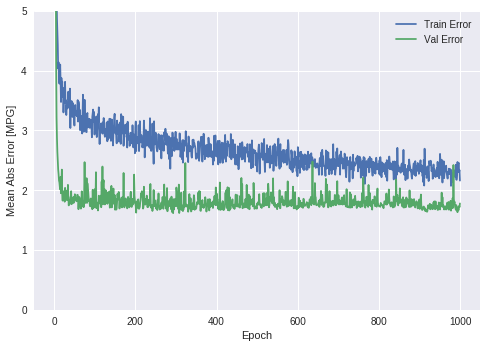

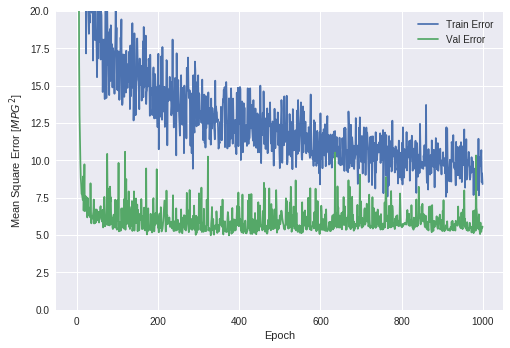

In [51]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)

epoch - 0


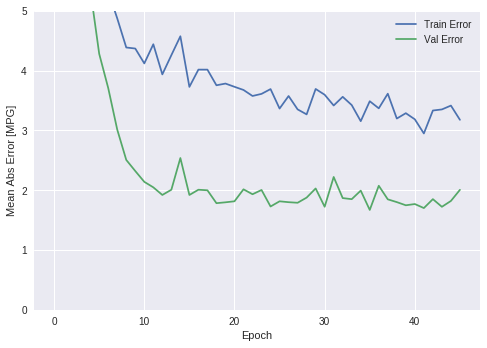

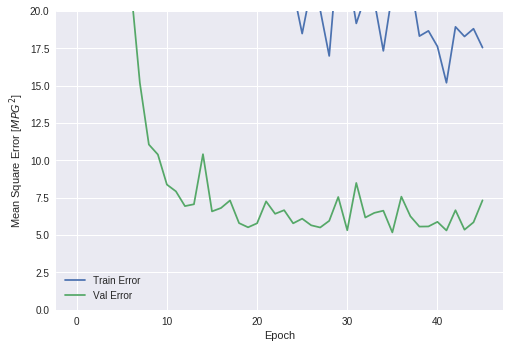

In [52]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [43]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

Testing set Mean Abs Error:  2.04 MPG


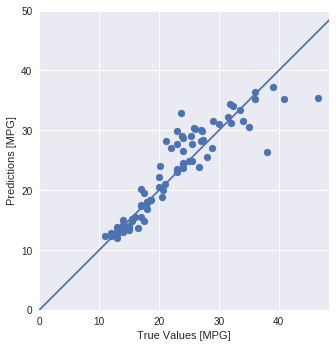

In [44]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

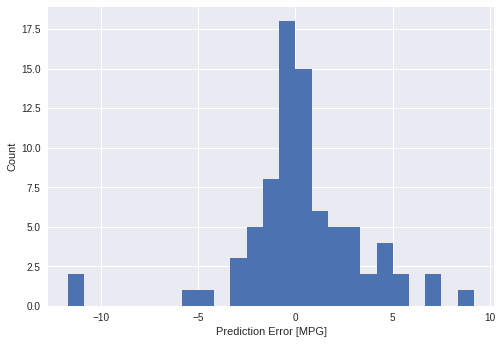

In [45]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")